# IBM Stock Price Time Series Analysis

## Getting the IBM Stock Data from Yahoo Finance

In [1]:
# Installing required libraries

!pip install yfinance pandas

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=5b4f3759019aaa9d900ae620a265282858d9b7730ff92551a382435086b94546
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\95\bb\20\859b0853d3683815ccb6342d9ac5a49380a681c96285821184
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


In [55]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp39-cp39-win_amd64.whl (614 kB)


In [94]:
# Importing libraries

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [ ]:
# Downloading IBM Stock Data

# Defining stock symbol for IBM
ticker_symbol = "IBM"

# Defining the time period (e.g., last 5 years)
start_date = "2020-01-01"
end_date = "2024-12-31"

# Fetch data using Yahoo Finance API
df = yf.download(ticker_symbol, start=start_date, end=end_date)


In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM
Date,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916


In [17]:
df.columns = df.columns.droplevel(1)
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916


In [18]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916


In [20]:
df.reset_index(inplace = True)
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
1,2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2,2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
3,2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
4,2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916


In [21]:
df.set_index('Date', inplace = True)
pd.to_datetime(df.index)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [23]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [25]:
df.to_csv("IBM_stock_data.csv")

In [28]:
df.sort_index()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916
...,...,...,...,...,...
2024-12-23,220.461243,222.259277,219.616877,221.335424,2988100
2024-12-24,222.924835,222.954635,220.073819,220.798999,1186200
2024-12-26,223.401657,223.908276,221.077147,221.832112,3286500


## Exploratory Data Analysis (EDA)

In [27]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916


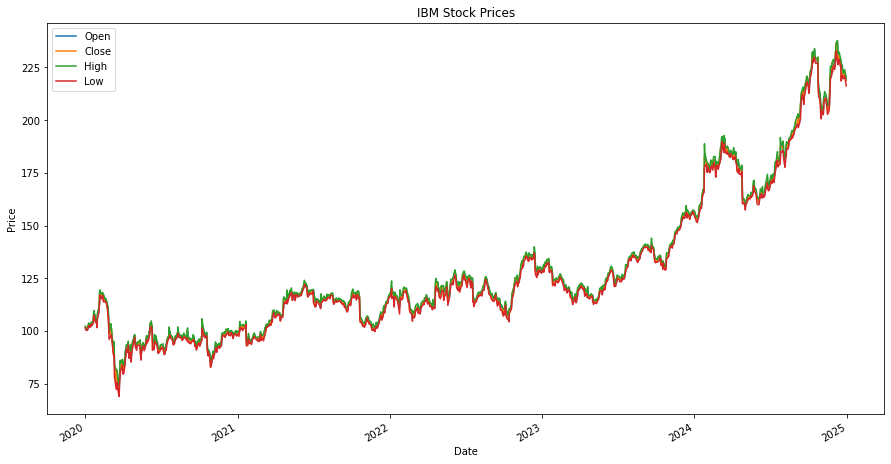

In [36]:
# line plot for each feature to watch trend

df[['Open', 'Close', 'High', 'Low']].plot(figsize=(15, 8), title='IBM Stock Prices')
plt.ylabel('Price')
plt.show()

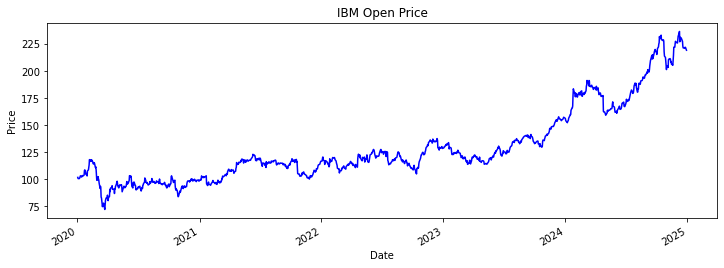

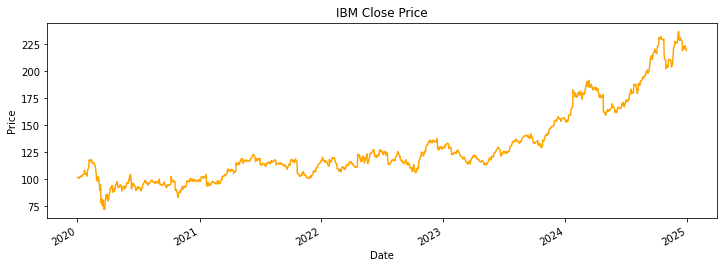

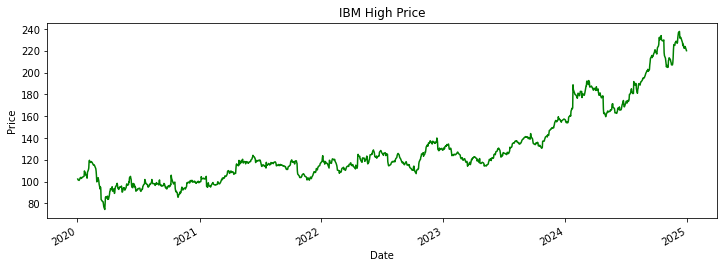

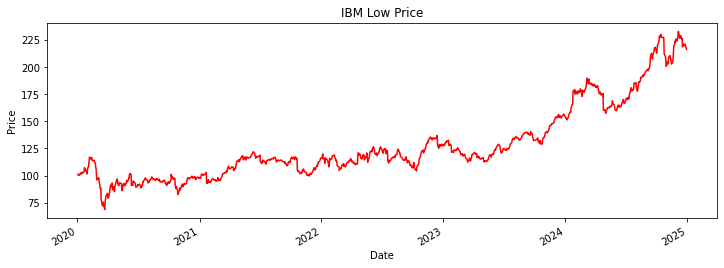

In [37]:
columns = ['Open', 'Close', 'High', 'Low']
colors = ['blue', 'orange', 'green', 'red']

for col, color in zip(columns, colors):
    plt.figure(figsize=(12, 4))
    df[col].plot(title=f"IBM {col} Price", color=color)
    plt.ylabel("Price")
    plt.show()

A stock has shown a strong upward movement over time.\
There are fluctuations but the general trend is positive.\
The Open, Close, High, and Low prices are tightly packed, there are no extreme price swings between these values in a single trading session.

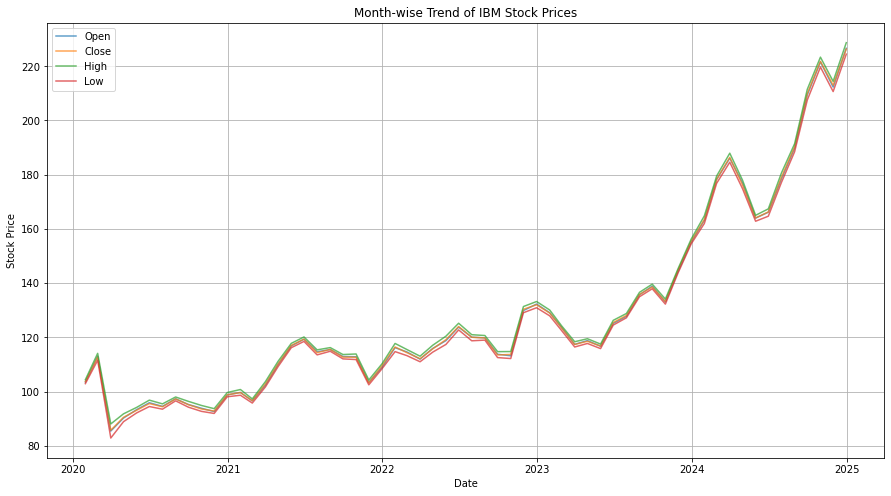

In [39]:
# Monthly trend Analysing

df_monthly = df.resample("M").mean()

# Plot month-wise trend for Open, Close, Low, High
plt.figure(figsize=(15, 8))
plt.plot(df_monthly.index, df_monthly["Open"], label="Open", alpha=0.7)
plt.plot(df_monthly.index, df_monthly["Close"], label="Close", alpha=0.7)
plt.plot(df_monthly.index, df_monthly["High"], label="High", alpha=0.7)
plt.plot(df_monthly.index, df_monthly["Low"], label="Low", alpha=0.7)

# Formatting
plt.legend()
plt.title("Month-wise Trend of IBM Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

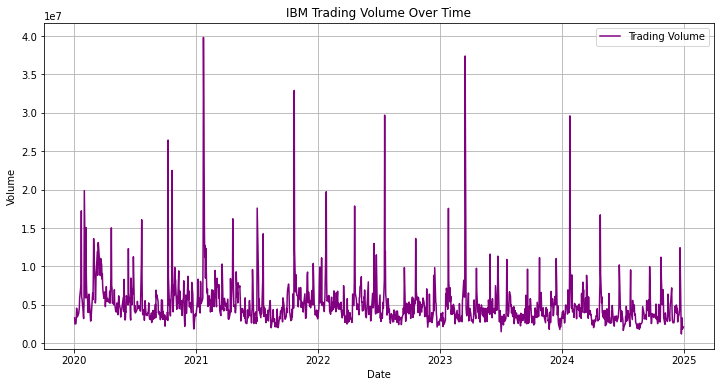

In [40]:
# Now lets check volume trend 

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Volume"], label="Trading Volume", color='purple')
plt.title("IBM Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

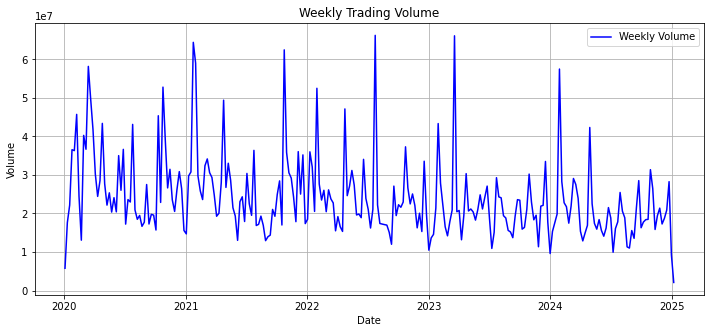

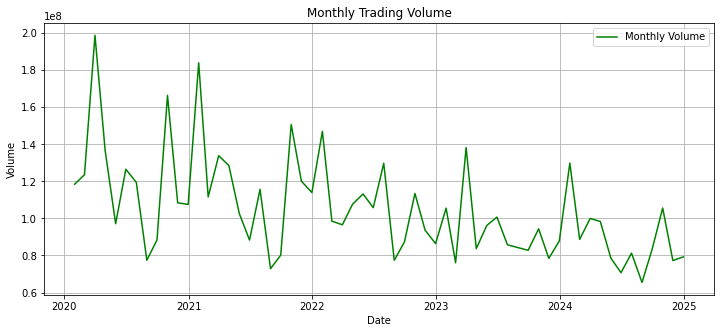

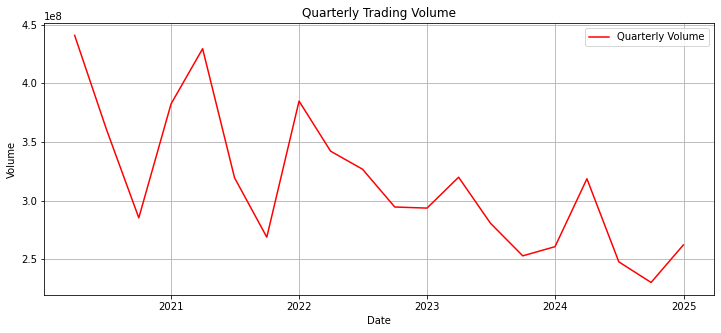

In [41]:
# Resample trading volume to different time frames
df_weekly = df["Volume"].resample("W").sum()  # Weekly total volume
df_monthly = df["Volume"].resample("M").sum()  # Monthly total volume
df_quarterly = df["Volume"].resample("Q").sum()  # Quarterly total volume

# Plot Weekly Trading Volume
plt.figure(figsize=(12, 5))
plt.plot(df_weekly.index, df_weekly, label="Weekly Volume", color="blue")
plt.title("Weekly Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

# Plot Monthly Trading Volume
plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index, df_monthly, label="Monthly Volume", color="green")
plt.title("Monthly Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

# Plot Quarterly Trading Volume
plt.figure(figsize=(12, 5))
plt.plot(df_quarterly.index, df_quarterly, label="Quarterly Volume", color="red")
plt.title("Quarterly Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

After the initial fluctuations, trading volume seems to have gradually declined with smaller spikes occurring occasionally.\
This could indicate a reduction in investor interest or stable market conditions with fewer major events influencing IBM's stock.

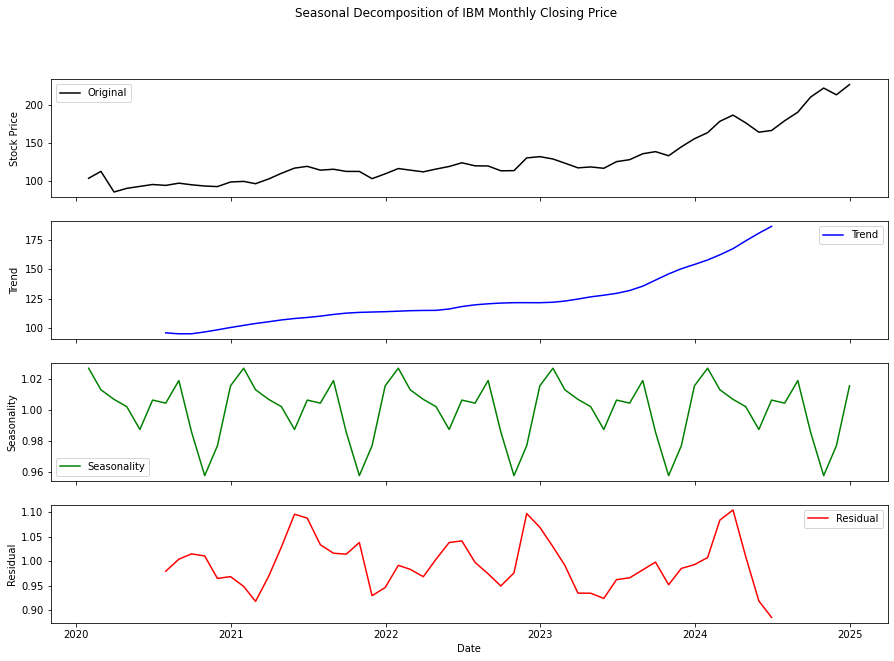

In [48]:
# Seasonal Decomposition

df_monthly = df["Close"].resample("M").mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_monthly, model="mul", period=12)  

# Plot decomposition results
fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

# Original Series
axes[0].plot(df_monthly, label="Original", color="black")
axes[0].set_ylabel("Stock Price")
axes[0].legend()

# Trend
axes[1].plot(decomposition.trend, label="Trend", color="blue")
axes[1].set_ylabel("Trend")
axes[1].legend()

# Seasonality
axes[2].plot(decomposition.seasonal, label="Seasonality", color="green")
axes[2].set_ylabel("Seasonality")
axes[2].legend()

# Residual
axes[3].plot(decomposition.resid, label="Residual", color="red")
axes[3].set_ylabel("Residual")
axes[3].legend()

plt.xlabel("Date")
plt.suptitle("Seasonal Decomposition of IBM Monthly Closing Price")
plt.show()

## ARIMA Model

In [78]:
df = df.asfreq('B')

In [57]:
# lets check the stationarity first

def adf_test(series):
    result = adfuller(series)
    print("p-value: ",result[1])
    
    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is not Stationary")

        
adf_test(df['Close'])

p-value:  0.9691420109482486
Series is not Stationary


In [66]:
# lets make data stationary using differencing

df['Close_diff'] = df['Close'].diff().dropna()
adf_test(df['Close_diff'].dropna())

p-value:  1.239659175595676e-19
Series is Stationary


In [67]:
df.head()

,Close,High,Low,Open,Volume,Daily Return,Close_diff
Date,,,,,,,
2020-01-02,101.918854,102.295161,101.429656,101.602752,3293436,NaN,NaN
2020-01-03,101.106041,101.497399,100.518997,100.526523,2482890,-0.007975,-0.812813
2020-01-06,100.925415,101.030774,100.248058,100.413634,2537073,-0.001786,-0.180626
2020-01-07,100.993141,101.572659,100.398584,100.616840,3232977,0.000671,0.067726
2020-01-08,101.836067,102.250008,100.789935,101.233978,4545916,0.008346,0.842926


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


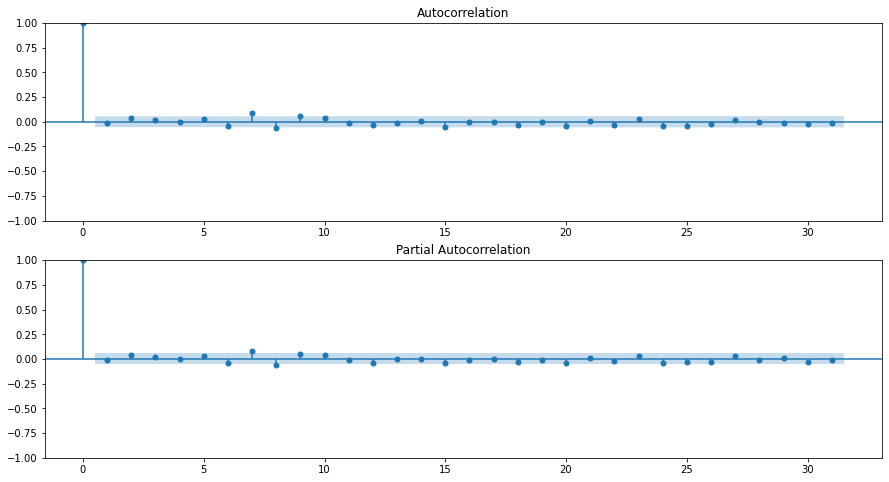

In [72]:
# Lets plot ACF and PACF plot

fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(df['Close_diff'].dropna(), ax=ax[0])
plot_pacf(df['Close_diff'].dropna(), ax=ax[1])
plt.show()

In [103]:
# Spliting the data into train and test

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [116]:
# Auto ARIMA to find best parameters

model_auto = auto_arima(train['Close'], seasonal=False)
print(model_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1042
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2045.060
Date:                Tue, 04 Mar 2025   AIC                           4102.121
Time:                        12:39:40   BIC                           4131.809
Sample:                    01-02-2020   HQIC                          4113.382
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7478      0.033    -53.699      0.000      -1.812      -1.684
ar.L2         -0.9224      0.031    -29.592      0.000      -0.984      -0.861
ma.L1          1.7570      0.037     47.586      0.0

In [115]:
print(train.isna().sum())  # Check NaN count in each column
print(test_predictions.isna().sum())  # Check NaN in predictions

Close            0
High            36
Low             36
Open            36
Volume          36
Daily Return    37
Close_diff      37
dtype: int64
0


In [114]:
train['Close'].fillna(method='ffill', inplace=True)  # Forward fill missing values


C:\Users\dell\AppData\Local\Temp\ipykernel_14544\2040216077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close'].fillna(method='ffill', inplace=True)  # Forward fill missing values


In [117]:
# Fit ARIMA model using best parameters

p, d, q = model_auto.order
model = ARIMA(train['Close'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1042
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2045.060
Date:                Tue, 04 Mar 2025   AIC                           4102.121
Time:                        12:39:56   BIC                           4131.809
Sample:                    01-02-2020   HQIC                          4113.382
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7478      0.033    -53.699      0.000      -1.812      -1.684
ar.L2         -0.9224      0.031    -29.592      0.000      -0.984      -0.861
ma.L1          1.7570      0.037     47.586      0.0

In [118]:
# Make predictions on test data

test_predictions = model_fit.forecast(steps=len(test))
test = test.copy()
test['Predictions'] = test_predictions.values

In [120]:
test = test.dropna(subset=['Close', 'Predictions'])

In [121]:
# Evaluate predictions
mae = mean_absolute_error(test['Close'], test['Predictions'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['Predictions']))
mape = mean_absolute_percentage_error(test['Close'], test['Predictions']) * 100
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

Test MAE: 32.8299
Test RMSE: 39.7275
MAPE: 16.20%


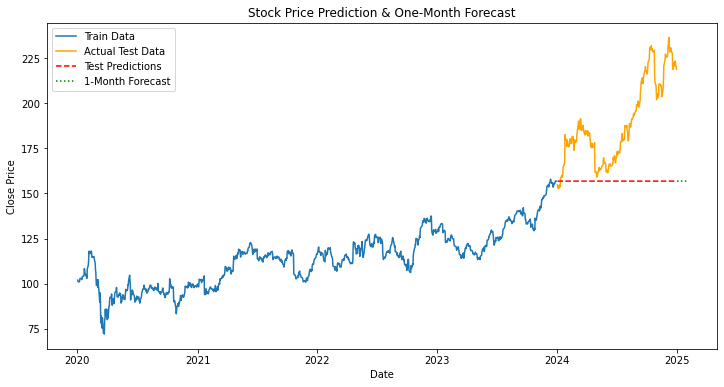

In [122]:
future_steps = 22  # Number of business days in a month
future_forecast = model_fit.forecast(steps=future_steps)

# Generate future dates (22 business days)
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='B')

# Create a DataFrame for future forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Close': future_forecast})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs predicted vs forecasted
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label="Train Data")
plt.plot(test['Close'], label="Actual Test Data", color='orange')
plt.plot(test['Predictions'], label="Test Predictions", color='red', linestyle='dashed')
plt.plot(forecast_df['Forecasted_Close'], label="1-Month Forecast", color='green', linestyle='dotted')

# Plot title and labels
plt.title("Stock Price Prediction & One-Month Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()